In [28]:
import pandas as pd
import numpy as np
from scipy import stats


EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

ho >>> mu = 13.20

h1 >>> mu < 13.20

In [3]:
z =  (12.2 - 13.2) / (2.5 / 40 ** 0.5)
z

-2.5298221281347035

In [29]:
stats.norm.cdf(z)

0.005706018193000826

>>>>>Result : P-value is less than 0.01.So we can reject to Hypothesis 0.

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [90]:
soil = pd.read_excel("soil.xlsx")
soil.head(3)

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337


In [45]:
soil.isnull().sum()

Soil1    5
Soil2    0
dtype: int64

ho >>  mu1 = mu2

h1 >> mu1 != mu2

In [10]:
# soil1 column's last 5 index is null. So we use -soil["Soil1"][:30]-
leveneTest = stats.levene(soil["Soil1"][:30], soil["Soil2"],center="mean")
leveneTest

LeveneResult(statistic=0.41953023361744246, pvalue=0.5195250549372259)

>>>>>levene test p-value very high. Therefore we must use assumed equal variance.

In [9]:
indtest = stats.ttest_ind(soil["Soil1"][:30], soil["Soil2"])
indtest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

>>>>>Result : The ttest P-value is less than 0.01. So we can reject to Hypothesis 0.

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

1- Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

2- Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

PART-1

In [91]:
pisa = pd.read_csv("2015_pisa.csv")
pisa.head(3)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262


In [35]:
pisa.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [77]:
pisa.groupby("Continent_Code").agg(["mean","median"])

internet_users_per_100                   Math             \
                                 mean     median        mean     median   
Continent_Code                                                            
AF                          43.359918  43.359918  363.212100  363.21210   
AS                          68.455613  74.000000  466.216647  459.81600   
EU                          77.274888  76.184000  477.981449  489.72870   
OC                          86.391704  86.391704  494.559750  494.55975   
SA                          60.180494  64.289000  402.887700  409.03330   

                   Reading                Science             
                      mean     median        mean     median  
Continent_Code                                                
AF              355.457400  355.45740  381.074250  381.07425  
AS              454.059682  433.54230  467.945847  456.48360  
EU              476.164608  487.25010  478.299381  490.22500  
OC              506.085650  506.08565  511.648700  511.64870  
SA              425.359229  425.30310  421.747186  424.59050

In [81]:
pisa.groupby("Continent_Code").agg(["std","var"])

internet_users_per_100                   Math               \
                                  std         var        std          var   
Continent_Code                                                              
AF                           7.297226   53.249507   5.099513    26.005030   
AS                          21.086060  444.621918  64.356490  4141.757822   
EU                          12.425773  154.399841  35.150403  1235.550805   
OC                           2.589686    6.706475   0.938401     0.880597   
SA                           9.772455   95.500869  18.128894   328.656783   

                  Reading                 Science               
                      std          var        std          var  
Continent_Code                                                  
AF               7.916909    62.677447   7.536556    56.799679  
AS              57.048962  3254.584049  56.671371  3211.644321  
EU              37.720545  1422.839540  34.450616  1186.844969  
OC               4.504341    20.289087   2.340241     5.476726  
SA              19.709688   388.471816  18.470319   341.152678

PART-2

h0 >> mu1 = mu2

h1 >> mu1 != mu2

In [92]:
pisa.head(3)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262


In [14]:
pisa.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [17]:
eu_math =  pisa[pisa.Continent_Code == "EU"]["Math"]
eu_math.isnull().sum()

0

In [18]:
as_math = pisa[pisa.Continent_Code == "AS"]["Math"]
as_math.isnull().sum()

0

In [19]:
indtest2 = stats.ttest_ind(eu_math,as_math)
indtest2

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

>>>>>Result : Independent Ttest P-value is very big. Therefore we  fail to reject the Hyporhesis 0. So we can't say EU and AS math value is different.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

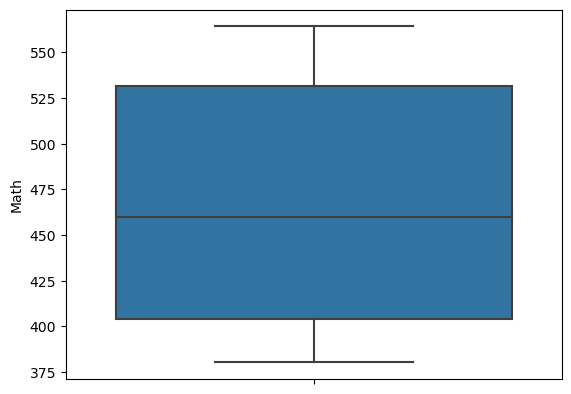

In [60]:
sns.boxplot(y=as_math)
plt.show()

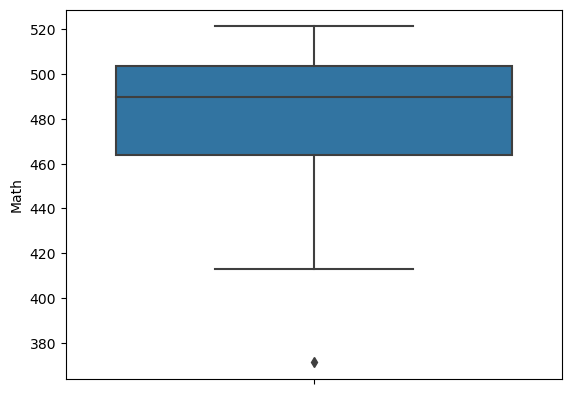

In [63]:
sns.boxplot(y=eu_math)
plt.show()

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

h0 >> mu1 = mu2

h1 >> mu1 != mu2

In [93]:
student = pd.read_csv("students_2014.csv")
student.head(3)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0


In [21]:
student.isnull().sum()

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [22]:
a = student[student.English.isnull()].index
a

Int64Index([  7,  35,  46,  47,  60, 101, 137, 195, 200, 233, 237, 246, 249,
            254, 274, 277, 282, 295, 314, 330, 379, 383, 384, 418, 421, 423],
           dtype='int64')

In [23]:
student.drop(index= a,axis= 1,inplace=True) # we drop the null index

In [24]:
b = student[student.Math.isnull()].index
b

Int64Index([89, 110, 116, 139, 167, 236, 238, 302, 307, 413, 417], dtype='int64')

In [25]:
student.drop(index= b,axis= 1,inplace=True) # we drop the null index

In [27]:
student.shape # data remaining after drop the null index

(398, 23)

In [26]:
pairedtest = stats.ttest_rel(student.English,student.Math, alternative="two-sided")
pairedtest

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

>>>>>Paired Ttest P-value is very tiny. Therefore we reject the Hyporhesis 0.